<a href="https://colab.research.google.com/github/jsh1021902/ai_for_machine_learning/blob/main/week4/5_handling_data_issues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling duplicate, missing, or invalid data

## About the data
In this notebook, we will using daily weather data that was taken from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2) and altered to introduce many common problems faced when working with data.

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Background on the data

Data meanings:
- `PRCP`: precipitation in millimeters
- `SNOW`: snowfall in millimeters
- `SNWD`: snow depth in millimeters
- `TMAX`: maximum daily temperature in Celsius
- `TMIN`: minimum daily temperature in Celsius
- `TOBS`: temperature at time of observation in Celsius
- `WESF`: water equivalent of snow in millimeters

Some important facts to get our bearings:
- According to the National Weather Service, the coldest temperature ever recorded in Central Park was -15°F (-26.1°C) on February 9, 1934: [source](https://www.weather.gov/media/okx/Climate/CentralPark/extremes.pdf)
- The temperature of the Sun's photosphere is approximately 5,505°C: [source](https://en.wikipedia.org/wiki/Sun)

## Setup
We need to import `pandas` and read in the dirty data to get started:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_03/

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_03


In [3]:
import pandas as pd

df = pd.read_csv('data/dirty_data.csv')

## Finding problematic data
A good first step is to look at some rows:

[결측치 제거 설명 링크](https://beneagain.tistory.com/49)

In [4]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


Looking at summary statistics can reveal strange or missing values:

In [5]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


The `info()` method can pinpoint missing values and wrong data types:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


We can use the `isna()`/`isnull()` method of the series to find nulls:

In [7]:
contain_nulls = df[
    df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna()
    | df.WESF.isna() | df.inclement_weather.isna()
]
contain_nulls.shape[0] # df의 row 수

765

In [8]:
df[df.SNOW.isna()| df.SNWD.isna() ]

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
10,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
21,2018-01-12T00:00:00,?,0.5,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
22,2018-01-12T00:00:00,?,0.5,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
25,2018-01-13T00:00:00,?,17.5,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
754,2018-12-28T00:00:00,?,11.4,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
756,2018-12-28T00:00:00,?,11.4,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
757,2018-12-29T00:00:00,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
758,2018-12-29T00:00:00,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


In [9]:
contain_nulls.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


Note that we can't check if we have `NaN` like this:

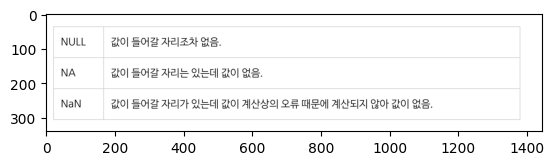

In [57]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('nanullnan차이.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

In [10]:
import numpy as np
df.inclement_weather == np.nan

0      False
1      False
2      False
3      False
4      False
       ...  
760    False
761    False
762    False
763    False
764    False
Name: inclement_weather, Length: 765, dtype: bool

In [11]:
df[df.inclement_weather == 'NaN'].shape[0]

0

This is because it is actually `np.nan`. However, notice this also doesn't work:

In [12]:
import numpy as np
df[df.inclement_weather == np.nan].shape[0]

0

We have to use one of the methods discussed earlier for this to work:

In [13]:
df[df.inclement_weather.isna()].shape[0]

357

We can find `-inf`/`inf` by comparing to `-np.inf`/`np.inf`:

In [14]:
df.SNWD

0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
760   -inf
761   -inf
762   -inf
763   -inf
764   -inf
Name: SNWD, Length: 765, dtype: float64

In [15]:
df.SNWD.isin([-np.inf, np.inf])

0      True
1      True
2      True
3      True
4      True
       ... 
760    True
761    True
762    True
763    True
764    True
Name: SNWD, Length: 765, dtype: bool

In [16]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

Rather than do this for each column, we can write a function that will use a [dictionary comprehension](https://www.python.org/dev/peps/pep-0274/) to check all the columns for us:

In [17]:
def get_inf_count(df):
    """Find the number of inf/-inf values per column in the dataframe"""
    return {
        col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
    }

get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

Before we can decide how to handle the infinite values of snow depth, we should look at the summary statistics for snowfall, which forms a big part in determining the snow depth:

In [18]:
df[df.SNWD == np.inf].SNOW.describe()

count     24.000000
mean     101.041667
std       74.498018
min       13.000000
25%       25.000000
50%      120.500000
75%      152.000000
max      229.000000
Name: SNOW, dtype: float64

In [19]:
df[df.SNWD == -np.inf].SNOW.describe()

count    553.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: SNOW, dtype: float64

In [20]:
pd.DataFrame({
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Let's now look into the `date` and `station` columns. We saw the `?` for station earlier, so we know that was the other unique value. However, we see that some dates are present 8 times in the data and we only have 324 days meaning we are also missing days:

In [21]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


We can use the `duplicated()` method to find duplicate rows:

In [22]:
df[df.duplicated()].shape[0]

284

In [23]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [24]:
df.duplicated()

0      False
1       True
2       True
3      False
4      False
       ...  
760    False
761     True
762     True
763    False
764     True
Length: 765, dtype: bool

In [25]:
df.duplicated(keep = False) # duplicate는 NaN 값이 있는지 확인하는 것. 중복된 행을 남기기 위해 keep = False 사용

# 중복된 어떤 행이든간에 True로 표시되므로, 이 옵션을 사용하면 모든 중복 행들을 찾아낼 수 있습니다.

0       True
1       True
2       True
3      False
4       True
       ...  
760     True
761     True
762     True
763     True
764     True
Length: 765, dtype: bool

In [26]:
df[~df.duplicated(keep = 'first')] # 중복되는 행 중 첫번째 값을 가져온다

# 첫 번째로 나타나는 중복 행은 False (즉, 중복되지 않았다고 판단)로 표시되고, 그 이후의 중복된 행들은 True로 표시됩니다.

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
755,2018-12-28T00:00:00,GHCND:USC00280907,11.7,0.0,-inf,6.1,-1.7,5.0,NaN,False
757,2018-12-29T00:00:00,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
759,2018-12-30T00:00:00,?,0.0,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
760,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False


The default for `keep` is `'first'` meaning it won't show the first row that the duplicated data was seen in; we can pass in `False` to see it though:

In [27]:
df[df.duplicated(keep=False)].shape[0]

482

We can also specify the columns to use:

In [28]:
df[df.duplicated(['date', 'station'])].shape[0]

284

Let's look at a few duplicates. Just in the few values we see here, we know that the top 4 are actually in the data 6 times because by default we aren't seeing their first occurrence:

In [29]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


## Mitigating Issues

### Handling duplicated data
Since we know we have NY weather data and noticed we only had two entries for `station`, we may decide to drop the `station` column because we are only interested in the weather data. However, when dealing with duplicate data, we need to think of the ramifications of removing it. Notice we only have data for the `WESF` column when the station is `?`:

In [30]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

If we determine it won't impact our analysis, we can use `drop_duplicates()` to remove them:

In [31]:
# 1. make the date a datetime
df.date = pd.to_datetime(df.date)

# 2. save this information for later
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF

# 3. sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# 4. drop duplicates based on the date column keeping the first occurrence
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date')

# 5. remove the station column because we are done with it
df_deduped = df_deduped.drop(columns='station').set_index('date').sort_index()

# 6. take valid station's WESF and fall back on station ? if it is null
df_deduped = df_deduped.assign(
    WESF=lambda x: x.WESF.combine_first(station_qm_wesf)
)

df_deduped.shape

(324, 8)

In [32]:
# 1. make the date a datetime
df.date = pd.to_datetime(df.date)

In [33]:
# 2. save this information for later
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF
station_qm_wesf

date
2018-09-04   NaN
2018-09-10   NaN
2018-09-05   NaN
2018-09-01   NaN
2018-09-02   NaN
              ..
2018-06-12   NaN
2018-06-11   NaN
2018-06-10   NaN
2018-06-09   NaN
2018-06-08   NaN
Name: WESF, Length: 232, dtype: float64

In [34]:
df[df.station == '?'].sort_values(by='WESF')

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
58,2018-01-30,?,1.5,13.0,inf,5505.0,-40.0,NaN,1.8,True
146,2018-03-13,?,3.0,13.0,inf,5505.0,-40.0,NaN,3.0,True
162,2018-03-21,?,6.6,114.0,inf,5505.0,-40.0,NaN,8.6,True
159,2018-03-21,?,6.6,114.0,inf,5505.0,-40.0,NaN,8.6,True
186,2018-04-02,?,14.0,152.0,inf,5505.0,-40.0,NaN,15.2,True
...,...,...,...,...,...,...,...,...,...,...
335,2018-06-09,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
334,2018-06-08,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
332,2018-06-08,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
329,2018-06-07,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


In [35]:
df[df.station == '?'].sort_values(by='WESF').sort_values(by='date')

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
8,2018-01-04,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
7,2018-01-04,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
...,...,...,...,...,...,...,...,...,...,...
758,2018-12-29,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
757,2018-12-29,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
759,2018-12-30,?,0.0,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
763,2018-12-31,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


drop_duplicates메서드는 내용이 중복되는 행을 제거하는 메서드

In [36]:
station_qm_wesf2 = df[df.station == '?'].sort_values(by='WESF').sort_values(by='date').drop_duplicates('date').set_index('date').WESF

In [37]:
station_qm_wesf2

date
2018-01-01     NaN
2018-01-04    19.3
2018-01-05     NaN
2018-01-07     NaN
2018-01-08     NaN
              ... 
2018-12-27     NaN
2018-12-28     NaN
2018-12-29     NaN
2018-12-30     NaN
2018-12-31     NaN
Name: WESF, Length: 232, dtype: float64

In [38]:
# 3. sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)
df

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,NaN,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
760,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,NaN,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True
...,...,...,...,...,...,...,...,...,...,...
201,2018-04-08,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
206,2018-04-12,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
208,2018-04-12,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
209,2018-04-12,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


In [39]:
# 4. drop duplicates based on the date column keeping the first occurrence
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date')
df_deduped

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,NaN,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,NaN,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...
211,2018-04-13,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
179,2018-03-30,?,0.8,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
188,2018-04-03,?,4.8,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
197,2018-04-06,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


Here we used the `combine_first()` method to coalesce the values to the first non-null entry; this means that if we had data from both stations, we would first take the value provided by the named station and if (and only if) that station was null would we take the value from the station named `?`. The following table contains some examples of how this would play out:

| station GHCND:USC00280907 | station ? | result of `combine_first()` |
| :---: | :---: | :---: |
| 1 | 17 | 1 |
| 1 | `NaN` | 1 |
| `NaN` | 17 | 17 |
| `NaN` | `NaN` | `NaN` |

Check out the 4th row&mdash;we have `WESF` in the correct spot thanks to the index:

In [40]:
df_deduped.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,NaN,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,NaN,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,NaN,False


### Dealing with nulls
We could drop nulls, replace them with some arbitrary value, or impute them using the surrounding data. Each of these options may have ramifications, so we must choose wisely.

We can use `dropna()` to drop rows where any column has a null value. The default options leave us hardly any data:

In [41]:
df_deduped.dropna().shape

(0, 10)

In [42]:
df_deduped.dropna()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather


If we pass `how='all'`, we can choose to only drop rows where everything is null, but this removes nothing:

In [43]:
df_deduped.dropna(how='all').shape

(324, 10)

We can use just a subset of columns to determine what to drop with the `subset` argument:

In [44]:
df_deduped.dropna(
    how='all', subset=['inclement_weather', 'SNOW', 'SNWD']
).shape

(293, 10)

This can also be performed along columns, and we can also require a certain number of null values before we drop the data:

In [45]:
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0] * .75).columns

Index(['date', 'station', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'inclement_weather'],
      dtype='object')

In [46]:
df_deduped.columns

Index(['date', 'station', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WESF', 'inclement_weather'],
      dtype='object')

We can choose to fill in the null values instead with `fillna()`:

In [47]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True)
df_deduped.head()

<ipython-input-47-d64e5c761ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped.loc[:,'WESF'].fillna(0, inplace=True)


,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,0.0,False


At this point we have done everything we can without distorting the data. We know that we are missing dates, but if we reindex, we don't know how to fill in the `NaN` data. With the weather data, we can't assume because it snowed one day that it will snow the next or that the temperature will be the same. For this reason, note that the next few examples are just for illustrative purposes only—just because we can do something doesn't mean we should.

That being said, let's try to address some of remaining issues with the temperature data. We know that when `TMAX` is the temperature of the Sun, it must be because there was no measured value, so let's replace it with `NaN`. We will also do so for `TMIN` which currently uses -40°C for its placeholder when we know that the coldest temperature ever recorded in NYC was -15°F (-26.1°C) on February 9, 1934:

In [48]:
df_deduped = df_deduped.assign(
    TMAX=lambda x: x.TMAX.replace(5505, np.nan),
    TMIN=lambda x: x.TMIN.replace(-40, np.nan),
)

We will also make an assumption that the temperature won't change drastically day-to-day. Note that this is actually a big assumption, but it will allow us to understand how `fillna()` works when we provide a strategy through the `method` parameter. The `fillna()` method gives us 2 options for the `method` parameter:
- `'ffill'` to forward-fill
- `'bfill'` to back-fill

*Note that `'nearest'` is missing because we are not reindexing.*

Here, we will use `'ffill'` to show how this works:

In [49]:
df_deduped.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,0.0,False


In [50]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
).head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,0.0,False


In [51]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill'),
    TOBS=lambda x: x.TMIN.fillna(method='bfill')
).head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.1,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-3.3,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,22.8,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.6,0.0,False


We can use `np.nan_to_num()` to turn `np.nan` into 0 and `-np.inf`/`np.inf` into large negative or positive finite numbers:

In [52]:
df_deduped.assign(
    SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-1.797693e+308,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-1.797693e+308,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-1.797693e+308,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-1.797693e+308,-10.0,-15.6,-15.0,0.0,False


Depending on the data we are working with, we can use the `clip()` method as an alternative to `np.nan_to_num()`. The `clip()` method makes it possible to cap values at a specific minimum and/or maximum threshold. Since `SNWD` can't be negative, let's use `clip()` to enforce a lower bound of zero. To show how the upper bound works, let's use the value of `SNOW`:

In [53]:
df_deduped.assign(
    SNWD=lambda x: x.SNWD.clip(0, x.SNOW)
).head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,0.0,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,0.0,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,0.0,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,127.0,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,0.0,-10.0,-15.6,-15.0,0.0,False


We can couple `fillna()` with other types of calculations. Here we replace missing values of `TMAX` with the median of all `TMAX` values, `TMIN` with the median of all `TMIN` values, and `TOBS` to the average of the `TMAX` and `TMIN` values. Since we place `TOBS` last, we have access to the imputed values for `TMIN` and `TMAX` in the calculation:

In [54]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
510,2018-08-31,GHCND:USC00280907,0.0,0.0,-inf,33.3,21.1,21.7,0.0,False
762,2018-12-31,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,0.0,False
506,2018-08-29,GHCND:USC00280907,0.0,0.0,-inf,33.9,22.8,26.1,0.0,False
11,2018-01-05,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True
12,2018-01-06,GHCND:USC00280907,0.0,0.0,-inf,-10.0,-15.6,-15.0,0.0,False


We can also use `apply()` for running the same calculation across columns. For example, let's fill all missing values with their rolling 7-day median of their values, setting the number of periods required for the calculation to 0 to ensure we don't introduce more extra `NaN` values. Rolling calculations will be covered in chapter 4, so this is a preview:

In [55]:
df_deduped.apply(
    # rolling calculations will be covered in chapter 4, this is a rolling 7-day median
    # we set min_periods (# of periods required for calculation) to 0 so we always get a result
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

DataError: ignored

The last strategy we could try is interpolation with the `interpolate()` method. We specify the `method` parameter with the interpolation strategy to use. There are many options, but we will stick with the default of `'linear'`, which will treat values as evenly spaced and place missing values in the middle of existing ones. We have some missing data, so we will reindex first. Look at January 9th, which we didn't have before—the values for `TMAX`, `TMIN`, and `TOBS` are the average of values the day prior (January 8th) and the day after (January 10th):

In [ ]:
df_deduped\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .apply(lambda x: x.interpolate())\
    .head(10)

<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="./4-reshaping_data.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_03/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_04/1-querying_and_merging.ipynb">
            <button>Chapter 4 &#8594;</button>
        </a>
    </div>
</div>
<hr>